In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
# Load the data
atheletes_csv = pd.read_csv('athlete_events.csv')
regions_csv = pd.read_csv('noc_regions.csv')

In [48]:
# Clean the data
athletes_columns_to_be_cleaned = ['Age', 'Team']
atheletes_csv = atheletes_csv.dropna(axis=0, subset=athletes_columns_to_be_cleaned)

regions_columns_to_be_cleaned = ['continent']
regions_csv = regions_csv.dropna(axis=0, subset=regions_columns_to_be_cleaned)
# We cleaned the data so every country is part of the 5 continents that participate in the olympic games
# Europe, Asia, Africa, America, Oceania
regions_order = ['Europe', 'Asia', 'Africa', 'America', 'Oceania']

In [49]:
# Merge the data
merged_data = pd.merge(atheletes_csv, regions_csv, on='NOC')
print(merged_data.head())

     ID           Name Sex   Age  Height  Weight   Team  NOC        Games  \
0     1      A Dijiang   M  24.0   180.0    80.0  China  CHN  1992 Summer   
1     2       A Lamusi   M  23.0   170.0    60.0  China  CHN  2012 Summer   
2   602  Abudoureheman   M  22.0   182.0    75.0  China  CHN  2000 Summer   
3  1463      Ai Linuer   M  25.0   160.0    62.0  China  CHN  2004 Summer   
4  1464      Ai Yanhan   F  14.0   168.0    54.0  China  CHN  2016 Summer   

   Year  Season            City       Sport  \
0  1992  Summer       Barcelona  Basketball   
1  2012  Summer          London        Judo   
2  2000  Summer          Sydney      Boxing   
3  2004  Summer          Athina   Wrestling   
4  2016  Summer  Rio de Janeiro    Swimming   

                                      Event Medal region notes continent  
0               Basketball Men's Basketball   NaN  China   NaN      Asia  
1              Judo Men's Extra-Lightweight   NaN  China   NaN      Asia  
2                 Boxing Men'

continent
Europe     155633
Asia        33470
Africa      11170
America     50187
Oceania     10739
Name: count, dtype: int64


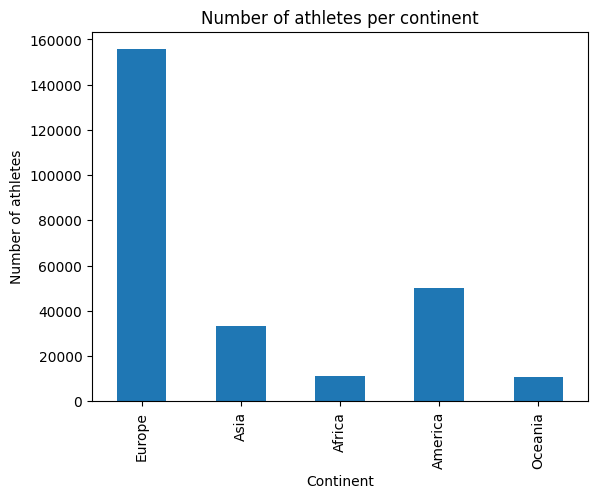

In [50]:
# Show the number of athletes per continent
# Plot the data
continent_athlete_count = merged_data['continent'].value_counts()
continent_athlete_count = continent_athlete_count.reindex(regions_order)
print(continent_athlete_count)
continent_athlete_count.plot(kind='bar')
plt.title('Number of athletes per continent')
plt.xlabel('Continent')
plt.ylabel('Number of athletes')
plt.show()




continent
Europe     24795
Asia        3479
Africa       555
America     8622
Oceania     1586
Name: count, dtype: int64


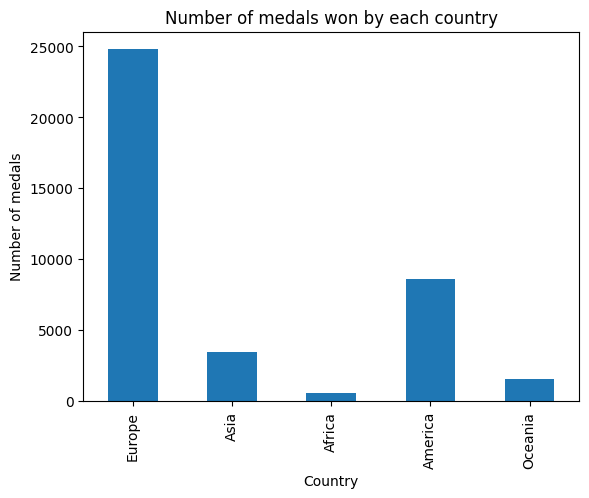

In [51]:
# Show the number of medals won by each country
# Remove nan values from the Medal column
medal_data = merged_data.dropna(axis=0, subset=['Medal'])
medal_count = medal_data['continent'].value_counts()
medal_count = medal_count.reindex(regions_order)
print(medal_count)
medal_count.plot(kind='bar')
plt.title('Number of medals won by each country')
plt.xlabel('Country')
plt.ylabel('Number of medals')
plt.show()

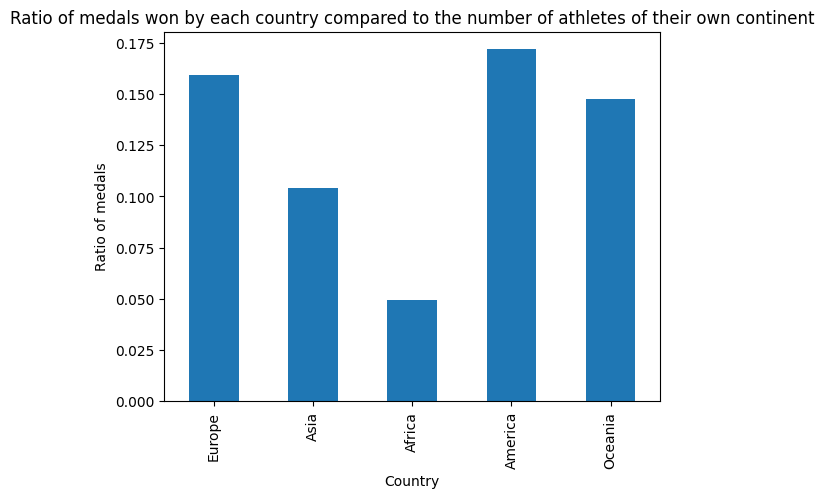

In [52]:
# Get the ratio of medals won by each country compared to the number of athletes of their own continent

continent_athlete_count = merged_data['continent'].value_counts()

# Get the number of medals per continent
medal_count = medal_data['continent'].value_counts()

# Get the ratio of medals per continent
medal_ratio = medal_count / continent_athlete_count

medal_ratio = medal_ratio.reindex(regions_order)
medal_ratio.plot(kind='bar')
plt.title('Ratio of medals won by each country compared to the number of athletes of their own continent')
plt.xlabel('Country')
plt.ylabel('Ratio of medals')
plt.show()



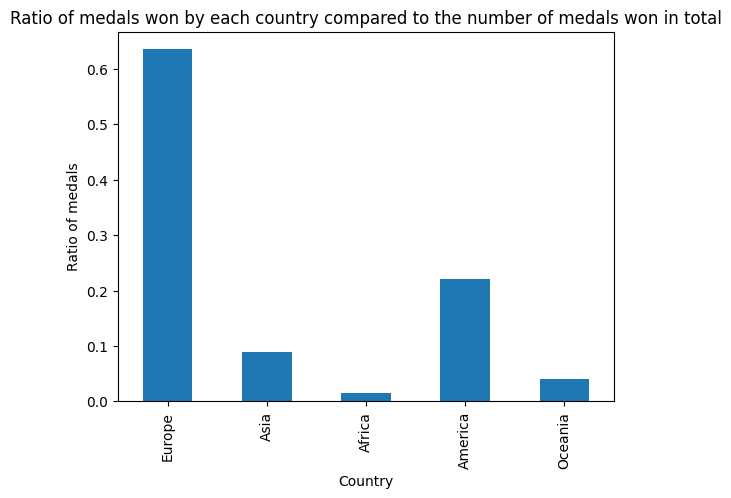

In [53]:

# Show the ratio of medals won by each country compared to the number of medals won in total
total_medals = medal_count.sum()
medal_ratio = medal_count / total_medals
medal_ratio = medal_ratio.reindex(regions_order)
medal_ratio.plot(kind='bar')
plt.title('Ratio of medals won by each country compared to the number of medals won in total')
plt.xlabel('Country')
plt.ylabel('Ratio of medals')
plt.show()